In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sn
from sklearn.model_selection import train_test_split
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils.multiclass import unique_labels
np.random.seed(500)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agokh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def removehttp (text):
    return re.sub('http[s]?://\S+','',text)

In [3]:
Corpus = pd.read_csv(r"C:\Users\agokh\Desktop\ML Data\Analysis_V2\Tweets_V3_5_5_balanced.csv",encoding='latin-1',sep=";")
# Corpus = pd.read_csv(r"C:\Users\agokh\Desktop\ML Data\NewsArticles.csv",encoding='latin-1',sep=";")
#Corpus

In [4]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
## Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [removehttp(entry) for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

In [5]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [6]:
sss = StratifiedShuffleSplit(n_splits=9, test_size=0.3, random_state=0)
X , y = Corpus['text_final'], Corpus['label']


In [7]:
Y_list = y.unique()
sss.get_n_splits(X,y)

for train_index, test_index in sss.split(X, y):
    Train_X, Test_X = X[train_index], X[test_index]
    Train_Y, Test_Y = y[train_index], y[test_index]

In [8]:
Encoder = LabelEncoder()
Train_YE = Encoder.fit_transform(Train_Y)
Test_YE = Encoder.fit_transform(Test_Y)

myFrame = pd.DataFrame(Train_Y)
#myFrame.insert(1,'encoded',Train_YE)
#myFrame

In [9]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
#print(Train_X_Tfidf)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [10]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_YE)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(Test_YE, predictions_SVM)*100)


SVM Accuracy Score ->  83.60655737704919


In [913]:
with open(r'C:\Users\agokh\Desktop\ML Data\test_X2.csv', 'a') as f:
    Test_X.to_csv(f, header=False, index=True)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\agokh\\Desktop\\ML Data\\test_X2.csv'

In [620]:
with open(r'C:\Users\agokh\Desktop\ML Data\test_Y2.csv', 'a') as f:
    Test_Y.to_csv(f, header=False, index=True)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\agokh\\Desktop\\ML Data\\test_Y2.csv'

In [184]:
with open(r'C:\Users\agokh\Desktop\ML Data\Train_X1.csv', 'a') as f:
    Train_X.to_csv(f, header=False, index=True)

In [38]:
with open(r'C:\Users\agokh\Desktop\ML Data\Train_Y1.csv', 'a') as f:
    Train_Y.to_csv(f, header=False, index=True)

In [29]:
a = Train_X_Tfidf.toarray()

In [606]:
#with open(r'C:\Users\agokh\Desktop\ML Data\Tfidf_6.txt', 'a') as f:
#    Train_X_Tfidf.to_txt(f, header=False, index=True)
#df200['mytextNow'] = Train_Y
  
# creating a blank series 
Type_new = pd.Series([]) 
df200 = pd.DataFrame(Train_X_Tfidf.toarray(), columns=Tfidf_vect.get_feature_names())

for i in range(len(df200)): 
    Type_new[i] = Train_Y.get_values()[i]

df200.insert(0,"TrainY",Type_new)

with open(r'C:\Users\agokh\Desktop\ML Data\Tfidf_X2.csv', 'w') as f:
    df200.to_csv(f, header=True, index=True)

In [330]:
Train_X

162    ['trade', 'war', 'america', 'oil', 'supply', '...
177    ['measure', 'value', 'versus', 'growth', 'slum...
119    ['top', 'market', 'worry', 'credit', 'suisse',...
140    ['president', 'donald', 'trump', 'push', 'fede...
154    ['president', 'donald', 'trump', 'say', 'xi', ...
168    ['scoop', 'brexit', 'vulnerability', 'may', 's...
170    ['frenzy', 'greet', 'new', 'stock', 'board', '...
227    ['canada', 'eu', 'agree', 'set', 'alternate', ...
44     ['dean', 'amp', 'deluca', 'struggle', 'hold', ...
230    ['two', 'dozen', 'european', 'city', 'ban', 'd...
302    ['pangolin', 'remarkably', 'easy', 'steal', 'b...
132    ['snb', 'president', 'thomas', 'jordan', 'face...
281    ['britain', 'leave', 'eu', 'october', 'without...
315    ['boris', 'johnson', 'hint', 'may', 'brexit', ...
13     ['new', 'cover', 'look', 'like', 'find', 'way'...
99     ['boris', 'johnson', 'even', 'enter', 'number'...
275    ['boj', 'hold', 'pattern', 'even', 'inflation'...
310    ['future', 'fall', 'dona

In [272]:
for i in (Train_X_Tfidf):
    print(i, Train_X_Tfidf)

  (0, 48)	0.3611678783927834
  (0, 250)	0.3375531492096323
  (0, 336)	0.30780210892571686
  (0, 729)	0.2735687738456775
  (0, 793)	0.2882055996661841
  (0, 976)	0.22706281656410962
  (0, 1087)	0.2735687738456775
  (0, 1161)	0.3611678783927834
  (0, 1239)	0.196158449714325
  (0, 1396)	0.30780210892571686
  (0, 1458)	0.2034480873809585
  (0, 1528)	0.2674324627449133   (0, 48)	0.3611678783927834
  (0, 250)	0.3375531492096323
  (0, 336)	0.30780210892571686
  (0, 729)	0.2735687738456775
  (0, 793)	0.2882055996661841
  (0, 976)	0.22706281656410962
  (0, 1087)	0.2735687738456775
  (0, 1161)	0.3611678783927834
  (0, 1239)	0.196158449714325
  (0, 1396)	0.30780210892571686
  (0, 1458)	0.2034480873809585
  (0, 1528)	0.2674324627449133
  (1, 651)	0.30485716761206644
  (1, 856)	0.2803546992285209
  (1, 882)	0.4515857597018976
  (1, 1291)	0.36035747490825376
  (1, 1306)	0.36035747490825376
  (1, 1509)	0.40110962815725126
  (1, 1511)	0.4515857597018976
  (2, 164)	0.2639529086640175
  (2, 266)	0.34165

  (0, 1532)	0.37963510311382276   (0, 48)	0.3611678783927834
  (0, 250)	0.3375531492096323
  (0, 336)	0.30780210892571686
  (0, 729)	0.2735687738456775
  (0, 793)	0.2882055996661841
  (0, 976)	0.22706281656410962
  (0, 1087)	0.2735687738456775
  (0, 1161)	0.3611678783927834
  (0, 1239)	0.196158449714325
  (0, 1396)	0.30780210892571686
  (0, 1458)	0.2034480873809585
  (0, 1528)	0.2674324627449133
  (1, 651)	0.30485716761206644
  (1, 856)	0.2803546992285209
  (1, 882)	0.4515857597018976
  (1, 1291)	0.36035747490825376
  (1, 1306)	0.36035747490825376
  (1, 1509)	0.40110962815725126
  (1, 1511)	0.4515857597018976
  (2, 164)	0.2639529086640175
  (2, 266)	0.34165997828729844
  (2, 327)	0.3278187075010255
  (2, 874)	0.18255989047113289
  (2, 1142)	0.3595044799173472
  (2, 1362)	0.20711672377707951
  :	:
  (249, 757)	0.24299543051169709
  (249, 894)	0.2953129739793705
  (249, 966)	0.24299543051169709
  (249, 976)	0.1856604633226965
  (249, 1208)	0.24299543051169709
  (249, 1342)	0.295312973979

  (0, 1501)	0.3081451091032782   (0, 48)	0.3611678783927834
  (0, 250)	0.3375531492096323
  (0, 336)	0.30780210892571686
  (0, 729)	0.2735687738456775
  (0, 793)	0.2882055996661841
  (0, 976)	0.22706281656410962
  (0, 1087)	0.2735687738456775
  (0, 1161)	0.3611678783927834
  (0, 1239)	0.196158449714325
  (0, 1396)	0.30780210892571686
  (0, 1458)	0.2034480873809585
  (0, 1528)	0.2674324627449133
  (1, 651)	0.30485716761206644
  (1, 856)	0.2803546992285209
  (1, 882)	0.4515857597018976
  (1, 1291)	0.36035747490825376
  (1, 1306)	0.36035747490825376
  (1, 1509)	0.40110962815725126
  (1, 1511)	0.4515857597018976
  (2, 164)	0.2639529086640175
  (2, 266)	0.34165997828729844
  (2, 327)	0.3278187075010255
  (2, 874)	0.18255989047113289
  (2, 1142)	0.3595044799173472
  (2, 1362)	0.20711672377707951
  :	:
  (249, 757)	0.24299543051169709
  (249, 894)	0.2953129739793705
  (249, 966)	0.24299543051169709
  (249, 976)	0.1856604633226965
  (249, 1208)	0.24299543051169709
  (249, 1342)	0.2953129739793

In [607]:
for i in predictions_SVM:    
 print(i)
     

6
3
6
3
8
7
2
7
7
1
3
5
8
4
1
7
8
2
8
1
0
3
5
1
6
3
6
3
8
2
8
3
8
4
5
1
6
7
2
0
2
5
3
2
1
2
4
0
8
3
8
6
8
5
1
6
6
8
3
7
1
6
6
3
1
2
2
6
5
4
6
7
5
1
1
6
2
2
8
6
0
6
0
7
1
8
8
7
4
7
4
7
4
7
7
6
7
1
8
1
6
8
3
5
4
6
7
4
8
1
1


In [410]:
for i in Test_YE:    
 print(i)

7
3
3
8
5
8
1
7
0
8
8
8
5
7
1
8
6
6
4
1
0
6
2
3
2
6
4
2
3
1
3
7
0
4
8
3
8
3
8
5
3
7
8
7
4
0
3
4
2
2
6
1
6
2
2
5
4
5
0
4
4
0
1
8
8
1
0
1
1
5
7
1
4
5
7
2
1
4
6
4
6
8
2
7
2
3
5
6
6
1
6
2
7
7
2
7
5
3
1
3
5
2
6
7
5
1
3
7
7


In [30]:
from sklearn.metrics import classification_report
target_names = ["CW","FI","IR","MD","O", "PU", "RI", "SF","TW"]
print(classification_report(Test_YE, predictions_SVM, target_names=target_names))

              precision    recall  f1-score   support

          CW       0.83      0.71      0.77         7
          FI       0.78      0.50      0.61        14
          IR       0.86      0.50      0.63        12
          MD       1.00      0.31      0.47        13
           O       0.18      0.91      0.29        11
          PU       1.00      0.45      0.62        11
          RI       1.00      0.44      0.62         9
          SF       0.78      0.61      0.68        23
          TW       1.00      0.09      0.17        11

   micro avg       0.50      0.50      0.50       111
   macro avg       0.82      0.50      0.54       111
weighted avg       0.82      0.50      0.55       111



In [31]:
array=confusion_matrix(Test_YE, predictions_SVM)

In [393]:
with open(r'C:\Users\agokh\Desktop\ML Data\Test_Y.csv', 'a') as f:
    Test_Y.to_csv(f, header=False, index=True)

In [900]:
print (predictions_SVM)

[6 3 6 3 8 7 2 4 7 1 3 4 4 4 0 0 4 2 4 1 4 4 5 1 5 1 6 4 3 2 8 8 4 4 5 1 6
 7 2 2 2 1 5 2 4 2 7 0 8 3 4 4 8 4 8 6 6 8 1 7 1 1 6 4 3 2 2 0 6 4 6 7 8 4
 4 1 2 2 8 4 0 2 0 7 1 5 8 7 4 7 7 7 4 7 7 6 8 4 8 1 7 5 3 5 3 1 7 7 4 1 1]


In [394]:
with open(r'C:\Users\agokh\Desktop\ML Data\Pred_Y.csv', 'a') as f:
    predictions_SVM.to_csv(f, header=False, index=True)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [226]:
Test_X_Tfidf[(Test_YE == 1) & (predictions_SVM[:,0].T == 0)]
#Test_X_Tfidf[(Test_YE == 0) & (predictions_SVM[:,0].T == 1)]

IndexError: too many indices for array

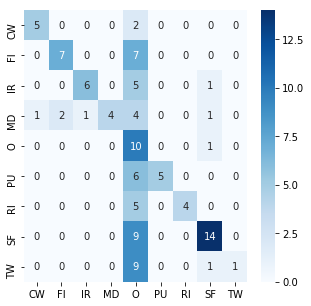

In [32]:
df_cm = pd.DataFrame(array, index = [ "CW","FI","IR","MD","O", "PU", "RI", "SF","TW"],
columns = ["CW","FI","IR","MD","O", "PU", "RI", "SF","TW"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, cmap="Blues")
#pd.crosstab(index, df.num_doors, margins=True, margins_name="Total")


In [271]:
pd.crosstab(df_cm.index, df_cm.columns, margins=True, margins_name="Total")

col_0,CW,FI,IR,MD,O,PU,RI,SF,TW,Total
row_0,,,,,,,,,,
CW,1,0,0,0,0,0,0,0,0,1
FI,0,1,0,0,0,0,0,0,0,1
IR,0,0,1,0,0,0,0,0,0,1
MD,0,0,0,1,0,0,0,0,0,1
O,0,0,0,0,1,0,0,0,0,1
PU,0,0,0,0,0,1,0,0,0,1
RI,0,0,0,0,0,0,1,0,0,1
SF,0,0,0,0,0,0,0,1,0,1
TW,0,0,0,0,0,0,0,0,1,1


In [560]:
Train_X

62     ['deutsche', 'bank', 'consider', 'sublet', 'lo...
48     ['bank', 'england', 'policy', 'maker', 'may', ...
265       ['europe', 'find', 'bad', 'economy', 'become']
245    ['market', 'abhor', 'candid', 'central', 'bank...
241    ['alternative', 'lender', 'step', 'property', ...
189    ['fails', 'first', 'attempt', 'form', 'new', '...
186    ['threat', 'seize', 'ship', 'retaliation', 'ar...
267    ['share', 'head', 'bad', 'month', 'nine', 'ami...
176    ['scoop', 'vulnerability', 'may', 'stop', 'ban...
341    ['sterling', 'may', 'scupper', 'grand', 'plan'...
133    ['philadelphia', 'energy', 'file', 'chapter', ...
363    ['hedge', 'fund', 'find', 'crosshairs', 'globa...
170    ['trade', 'war', 'america', 'oil', 'supply', '...
88     ['fed', 'richard', 'clarida', 'say', 'policy',...
281              ['plan', 'face', 'scottish', 'barrier']
191    ['eu', 'raise', 'stake', 'trade', 'conflict', ...
272    ['stock', 'head', 'bad', 'day', 'six', 'week',...
154    ['bayer', 'ag', 'agree',

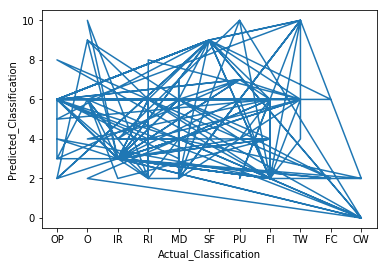

In [13]:
plt.xlabel("Actual_Classification") 
plt.ylabel("Predicted_Classification") 
plt.plot(Test_Y,predictions_SVM) 
plt.show()

In [230]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 6  1  0  0  0  0  0  0  0]
 [ 0 12  0  1  1  0  0  0  0]
 [ 0  0 11  1  0  0  1  0  0]
 [ 0  2  1  4  2  1  1  1  0]
 [ 0  3  0  2  3  1  0  1  1]
 [ 0  3  0  0  0  6  1  0  1]
 [ 0  4  0  0  1  0  5  1  0]
 [ 0  0  0  0  1  1  0 13  0]
 [ 0  1  0  0  0  3  0  0  9]]


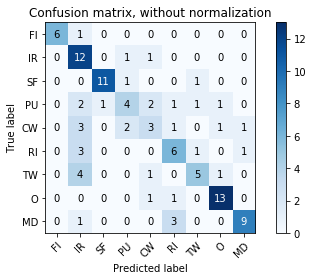

In [231]:

plot_confusion_matrix(Test_YE, predictions_SVM, classes=Y_list,normalize=False,title='Confusion matrix, without normalization')
plt.show()
